# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. After collecting data and save it into a local `.csv` file

### Scraping data from Skytrax

After visiting [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

Navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] to see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew with British Airways ...
1,✅ Trip Verified | Straightforward check in T...
2,Not Verified | I am beyond upset and disgusted...
3,✅ Trip Verified | I purchased round trip dir...
4,Not Verified | I booked two business class sea...


In [4]:
df.to_csv("/content/BA_reviews.csv")

The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 Refining this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [6]:
# Remove unnecessary text, for example, "✅ Trip Verified"
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified |', '')
df['reviews'] = df['reviews'].str.replace( 'Not Verified |', '')

# You might want to remove leading and trailing whitespaces after removing the text
df['reviews'] = df['reviews'].str.strip()

# Display the cleaned DataFrame
print(df.head())

# Save the cleaned data to a new CSV file or overwrite the existing one
df.to_csv('cleaned_reviews.csv', index=False)

                                             reviews
0  Flew with British Airways club Europe on Satur...
1  Straightforward check in T5. New site for club...
2  I am beyond upset and disgusted with the disre...
3  I purchased round trip direct flight business ...
4  I booked two business class seats. We had a me...


In [7]:
df.head()

,reviews
0,Flew with British Airways club Europe on Satur...
1,Straightforward check in T5. New site for club...
2,I am beyond upset and disgusted with the disre...
3,I purchased round trip direct flight business ...
4,I booked two business class seats. We had a me...


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

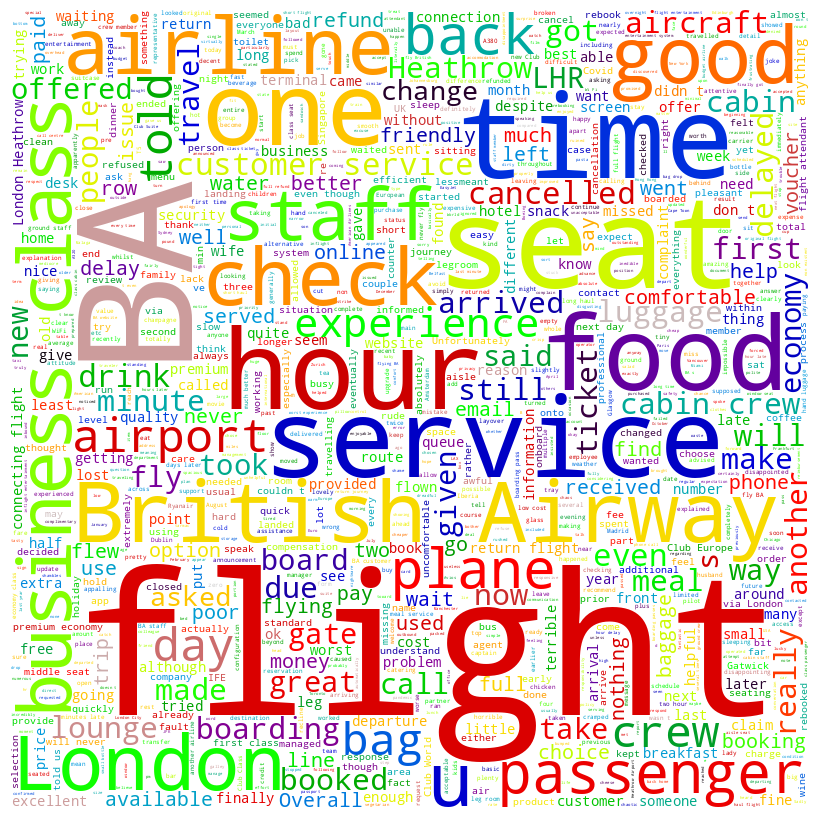

In [10]:
all_text=df['reviews'].str.cat(sep=' ')
plt.figure(figsize=(12,8))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=800,max_words=1000, background_color='white',colormap="nipy_spectral", stopwords=stopwords).generate(all_text)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

If Needed use this
```
column_to_drop = 'Column_Name'

# Use the drop() method to remove the specified column
df = df.drop(column_to_drop, axis=1)

print(df)
```

In [11]:
# Display the number of missing values in each column
print("Number of missing values before dropping:", df.isnull().sum())

# Drop rows with any missing values
df = df.dropna()

# Display the number of missing values in each column after dropping
print("Number of missing values after dropping:", df.isnull().sum())

Number of missing values before dropping: reviews    0
dtype: int64
Number of missing values after dropping: reviews    0
dtype: int64


# Lexicon-based sentiment analysis

In [12]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [13]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to each review in the 'reviews' column
df['sentiment_scores'] = df['reviews'].apply(lambda x: sid.polarity_scores(x))

# Extract the compound sentiment score
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

# Define thresholds for classification
threshold_positive = 0.1
threshold_negative = -0.1

# Classify reviews based on the compound score
df['sentiment'] = df['compound_score'].apply(lambda score: 'positive' if score > threshold_positive else 'negative' if score < threshold_negative else 'neutral')

# Display the results
print(df[['reviews', 'compound_score', 'sentiment']])


                                               reviews  compound_score  \
0    Flew with British Airways club Europe on Satur...         -0.9371   
1    Straightforward check in T5. New site for club...          0.8793   
2    I am beyond upset and disgusted with the disre...         -0.9942   
3    I purchased round trip direct flight business ...         -0.8155   
4    I booked two business class seats. We had a me...         -0.4019   
..                                                 ...             ...   
995  BA762 Heathrow to Oslo I have flown with BA a ...          0.9795   
996  Hamburg to Abu Dhabi via London Heathrow. Init...         -0.2964   
997  New York to Glasgow via London. A routine and ...          0.9942   
998  London Heathrow to New York. The staff went ab...          0.9788   
999  Gatwick to Bermuda. Boarded very quickly and o...          0.9802   

    sentiment  
0    negative  
1    positive  
2    negative  
3    negative  
4    negative  
..        ...  

In [14]:
df.head()

,reviews,sentiment_scores,compound_score,sentiment
0,Flew with British Airways club Europe on Satur...,"{'neg': 0.15, 'neu': 0.85, 'pos': 0.0, 'compou...",-0.9371,negative
1,Straightforward check in T5. New site for club...,"{'neg': 0.042, 'neu': 0.783, 'pos': 0.174, 'co...",0.8793,positive
2,I am beyond upset and disgusted with the disre...,"{'neg': 0.135, 'neu': 0.832, 'pos': 0.034, 'co...",-0.9942,negative
3,I purchased round trip direct flight business ...,"{'neg': 0.056, 'neu': 0.938, 'pos': 0.006, 'co...",-0.8155,negative
4,I booked two business class seats. We had a me...,"{'neg': 0.081, 'neu': 0.888, 'pos': 0.03, 'com...",-0.4019,negative


In [15]:
# Specify the text you want to filter
specific_text = 'positive'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")


Number of 'positive' Reviews: 462


In [16]:
# Specify the text you want to filter
specific_text = 'negative'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'negative' Reviews: 508


In [17]:
# Specify the text you want to filter
specific_text = 'neutral'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'neutral' Reviews: 30


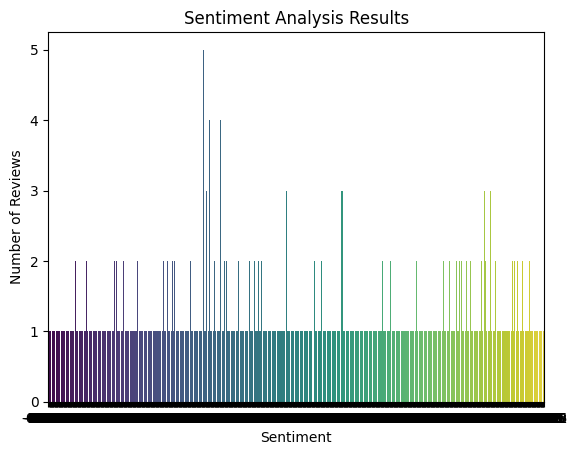

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Seaborn countplot
sns.countplot(x='compound_score', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis Results')

# Show the plot
plt.show()


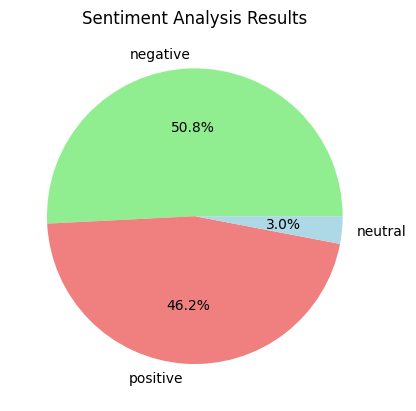

In [19]:
# Count the number of occurrences for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])

# Add title
plt.title('Sentiment Analysis Results')

# Show the plot
plt.show()

:

# BERT MODEL (Bidirectional Encoder Representations from Transformers)

In [20]:
!pip install transformers
!pip install torch


In [21]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load your dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('cleaned_reviews.csv')

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Assuming 3 classes: positive, negative, neutral

# Tokenize the reviews and pad sequences
max_len = 64  # Adjust as needed
padded_reviews = []

for review in df['reviews']:
    tokens = tokenizer.encode(review, add_special_tokens=True)
    padded_tokens = tokens[:max_len] + [0] * (max_len - len(tokens))  # Pad with zeros
    padded_reviews.append(padded_tokens)

# Convert to PyTorch tensor
padded_reviews = torch.tensor(padded_reviews)

# Create DataLoader
dataset = torch.utils.data.TensorDataset(padded_reviews)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=False)

# Inference loop
model.eval()
predictions = []

with torch.no_grad():
    for batch in dataloader:
        inputs = batch[0]
        outputs = model(inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=1)
        predictions.extend(predicted_class.numpy())

# Map predictions to sentiment labels
label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
df['sentiment'] = [label_mapping[pred] for pred in predictions]

# Display the results
print(df[['reviews', 'sentiment']])


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Token indices sequence length is longer than the specified maximum sequence length for this model (601 > 512). Running this sequence through the model will result in indexing errors
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


                                               reviews sentiment
0    Flew with British Airways club Europe on Satur...  negative
1    Straightforward check in T5. New site for club...  negative
2    I am beyond upset and disgusted with the disre...  positive
3    I purchased round trip direct flight business ...  positive
4    I booked two business class seats. We had a me...  negative
..                                                 ...       ...
995  BA762 Heathrow to Oslo I have flown with BA a ...   neutral
996  Hamburg to Abu Dhabi via London Heathrow. Init...   neutral
997  New York to Glasgow via London. A routine and ...  negative
998  London Heathrow to New York. The staff went ab...  negative
999  Gatwick to Bermuda. Boarded very quickly and o...   neutral

[1000 rows x 2 columns]


In [22]:
df.head()

,reviews,sentiment
0,Flew with British Airways club Europe on Satur...,negative
1,Straightforward check in T5. New site for club...,negative
2,I am beyond upset and disgusted with the disre...,positive
3,I purchased round trip direct flight business ...,positive
4,I booked two business class seats. We had a me...,negative


The model did not work well

In [23]:
# Specify the text you want to filter
specific_text = 'positive'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'positive' Reviews: 445


In [24]:
# Specify the text you want to filter
specific_text = 'negative'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'negative' Reviews: 208


In [25]:
# Specify the text you want to filter
specific_text = 'neutral'

# Filter the DataFrame based on the specific text
filtered_df = df[df['sentiment'] == specific_text]

# Count the occurrences of the specific text
count = filtered_df.shape[0]

# Display the results
print(f"Number of '{specific_text}' Reviews: {count}")

Number of 'neutral' Reviews: 347


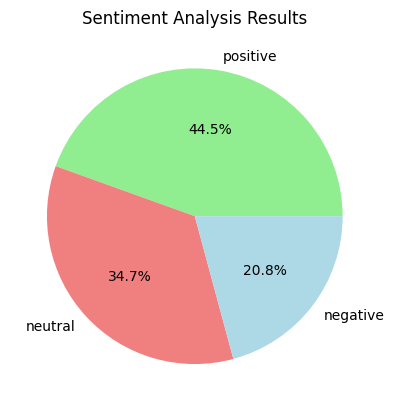

In [26]:
# Count the number of occurrences for each sentiment class
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])

# Add title
plt.title('Sentiment Analysis Results')

# Show the plot
plt.show()

A biased result from BERT

# Frequency Chart

In [27]:
from nltk import FreqDist, word_tokenize

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
df = pd.read_csv('cleaned_reviews.csv')


In [34]:

from nltk.corpus import stopwords

# Convert the list of stopwords into a set for faster lookup
stopword = set(stopwords.words('english'))

# Display the set of stopwords
stopword


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [35]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'reviews' column
df['reviews_no_stopwords'] = df['reviews'].apply(remove_stopwords)


In [36]:
print(df[['reviews', 'reviews_no_stopwords']])


                                               reviews  \
0    Flew with British Airways club Europe on Satur...   
1    Straightforward check in T5. New site for club...   
2    I am beyond upset and disgusted with the disre...   
3    I purchased round trip direct flight business ...   
4    I booked two business class seats. We had a me...   
..                                                 ...   
995  BA762 Heathrow to Oslo I have flown with BA a ...   
996  Hamburg to Abu Dhabi via London Heathrow. Init...   
997  New York to Glasgow via London. A routine and ...   
998  London Heathrow to New York. The staff went ab...   
999  Gatwick to Bermuda. Boarded very quickly and o...   

                                  reviews_no_stopwords  
0    Flew British Airways club Europe Saturday 31st...  
1    Straightforward check T5 . New site club check...  
2    beyond upset disgusted disregard , lack knowle...  
3    purchased round trip direct flight business cl...  
4    booked two bu

In [37]:
df["reviews_no_stopwords"][999]

'Gatwick Bermuda . Boarded quickly time , Seating area smart , appearance much better old aircraft normally turn . Service good , food best BA , new crockery added good feel appearance , long overdue . Duvet bedding much better expect high-cost route , Pillow fabulous , gone small pillows luxurious pillow want use . 10/10 flight crew , even though full front , hope turning point British Airways . Thank looking forward Seychelles flight October Rio flight December , keep coming .'

In [38]:
from nltk.corpus import stopwords
def clean_reviews_no_stopwords(text):

    # Remove HTML tags if present
    if "<" in text:
        text = BeautifulSoup(text, 'html.parser').get_text()

    # Remove URL addresses
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)

    # Remove irrelevant characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    text = ' '.join(filtered_words)

    return text

In [39]:
df["reviews_no_stopwords"] = df["reviews_no_stopwords"].apply(clean_reviews_no_stopwords)

In [40]:
# Tokenize the reviews into words
all_words = [word.lower() for review in df['reviews_no_stopwords'] for word in word_tokenize(review)]

# Calculate the frequency distribution
freq_dist = FreqDist(all_words)


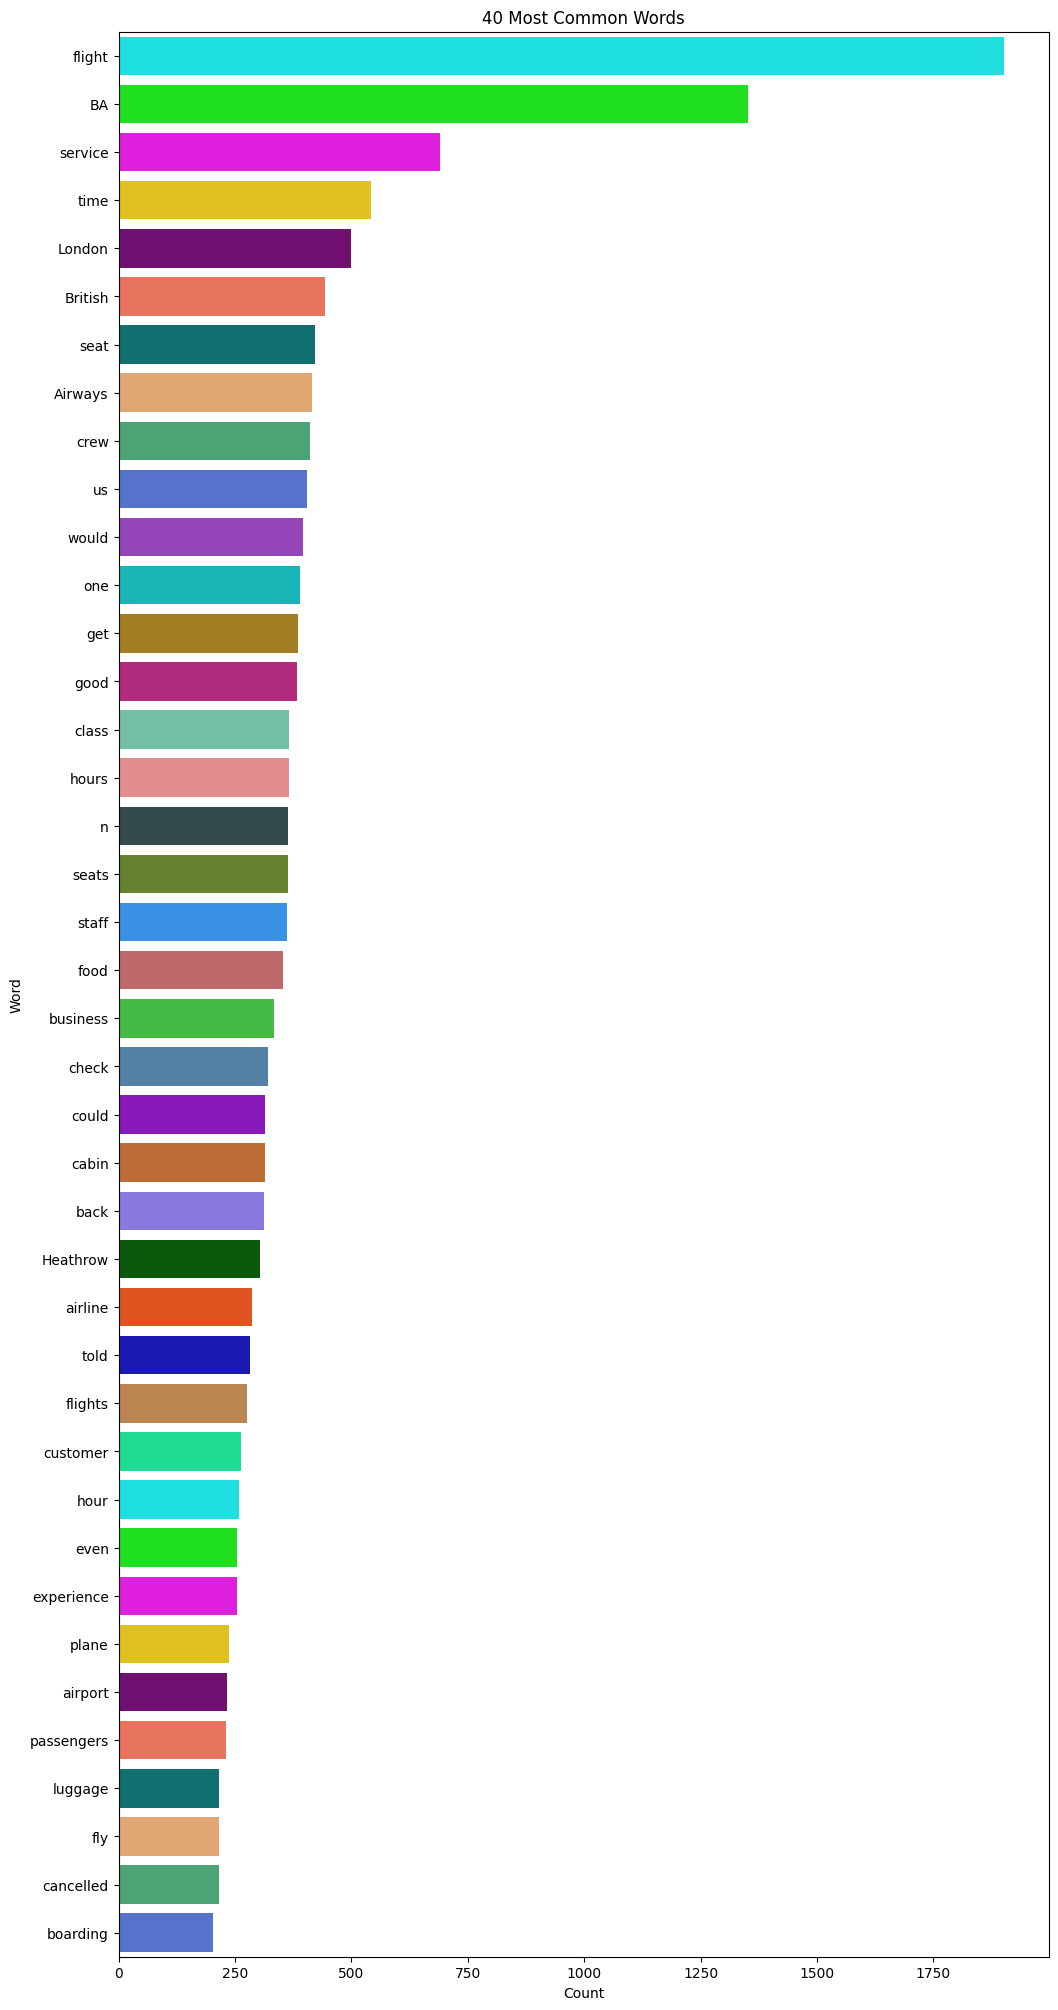

In [41]:
from itertools import chain
from collections import Counter

data_set =df["reviews_no_stopwords"].str.split()
all_words = list(chain.from_iterable(data_set))
counter = Counter(all_words)
common_words = counter.most_common(40)
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

colors = ["cyan", "lime", "magenta", "gold", "purple", "tomato", "teal", "sandybrown", "mediumseagreen",
          "royalblue", "darkorchid", "darkturquoise", "darkgoldenrod", "mediumvioletred", "mediumaquamarine",
          "lightcoral", "darkslategray", "olivedrab", "dodgerblue", "indianred", "limegreen", "steelblue",
          "darkviolet", "chocolate", "mediumslateblue", "darkgreen", "orangered", "mediumblue", "peru", "mediumspringgreen"]

plt.figure(figsize=(12, 25))
sns.barplot(x='Count', y='Word', data=df_common_words, palette=colors)
plt.title('40 Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [42]:
print(df_common_words)

          Word  Count
0       flight   1902
1           BA   1351
2      service    691
3         time    542
4       London    500
5      British    443
6         seat    421
7      Airways    416
8         crew    411
9           us    404
10       would    396
11         one    390
12         get    386
13        good    383
14       class    367
15       hours    366
16           n    364
17       seats    364
18       staff    361
19        food    353
20    business    334
21       check    321
22       could    314
23       cabin    314
24        back    313
25    Heathrow    304
26     airline    287
27        told    283
28     flights    275
29    customer    262
30        hour    258
31        even    255
32  experience    255
33       plane    238
34     airport    233
35  passengers    231
36     luggage    216
37         fly    216
38   cancelled    216
39    boarding    202


In [43]:
# Get the 40 most common words
top_words = freq_dist.most_common(40)

# Create a DataFrame with the 40 most common words
df_common_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Save the DataFrame to a CSV file
df_common_words.to_csv('common_words.csv', index=False)